# Harvesting log file metadata

[ Do NOT run and update this notebook itself (except when actually amending or improving it).   Instead, use the "Duplicate" option to make a copy, and use that to do visual validation. ]

## Standard startup

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
top='/groups/astro/aake/codes/dispatch2/'            # aake
#top='/groups/astro/xxxx/codes/dispatch2/'                  # xxxx

In [3]:
import os
os.chdir(top+'experiments/ISM/python')
import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis

## Accessing tagged metadata in rank log files

In [4]:
dis.logdata()

syntax: logdata(run,tag,[col0,col1,...]{,file='filename'})


Giving either a (run,tag) argument or a (file='filename',tag='some_tag') argument, one gets a sample line with enumerated columns to choose from:

In [5]:
dis.logdata('tmp1','sink_t%accrete:')

sink_t%accrete: id,nm,time,rpos,vel,m,dmdt,d_max =   1517   174  8.5165E-07  -0.406  -0.031  -0.781     0.000   0.000   0.000    0.00E+00  0.00E+00  1.01E+09
              0                                1 2      3     4           5       6       7       8         9      10      11          12        13        14 
syntax: logdata(run,tag,[col0,col1,...]{,file='filename'})


In [6]:
dis.logdata(file='../data/tmp1/rank_00000.log',tag='sink_t%accrete:')

sink_t%accrete: id,nm,time,rpos,vel,m,dmdt,d_max =   1517   174  8.5165E-07  -0.406  -0.031  -0.781     0.000   0.000   0.000    0.00E+00  0.00E+00  1.01E+09
              0                                1 2      3     4           5       6       7       8         9      10      11          12        13        14 
syntax: logdata(run,tag,[col0,col1,...]{,file='filename'})


Add a columns argument, and the procedure returns a result with shape (n_col,n_row)

In [7]:
r=dis.logdata('tmp1','sink_t%accrete:',[3,5,12,13,14])
r.shape

(5, 18472)

Here's how to select only the rows where the 0th columns has a certain value:

In [8]:
w=where(r[0]==1853.)
t,m,dm,d=r[1:,w].squeeze()

Scaling parameters are available in snapshot attributes:

In [9]:
sn=dis.snapshot(223,'tmp1')
scaling_msun=sn.scaling.m/sn.cgs.m_sun
scaling_yr=sn.scaling.t/sn.cgs.yr
scaling_dmdt=scaling_msun/scaling_yr

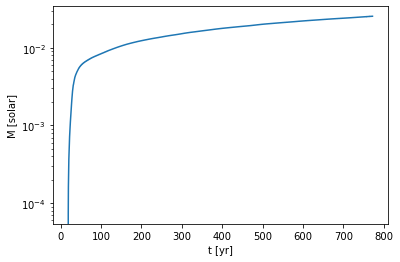

In [10]:
semilogy(t*scaling_yr,m*scaling_msun); xlabel('t [yr]'); ylabel('M [solar]');

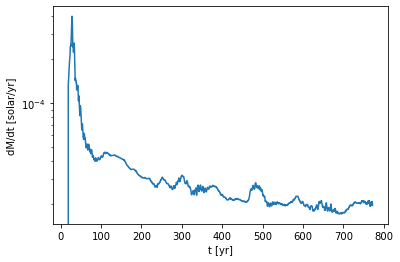

In [11]:
semilogy(t*scaling_yr,dm*scaling_dmdt); xlabel('t [yr]'); ylabel('dM/dt [solar/yr]');

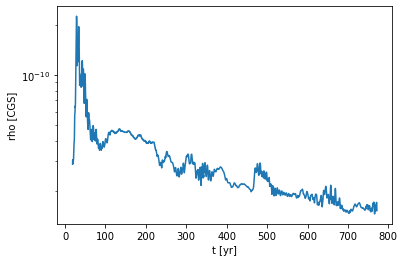

In [12]:
semilogy(t*scaling_yr,d*sn.scaling.d); xlabel('t [yr]'); ylabel('rho [CGS]');